# 柱状图的绘制

### 【运行】导入库（第一步）

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openpyxl

### 【运行】设置字体（第二步）

In [2]:
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体 "SimHei"黑体
    "font.weight": 'normal' , #bold粗体,bolder更粗,lighter更细.400等同于normal700等同于bold
    "font.size": 14,  # 五号，10.5磅 .'medium',#or large,small
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)

## 【运行】读取Excel数据并显示（可选）（第三步）

In [3]:
# 例子
name = ['Jacky', 'Rosé', 'Lisa', 'Jisoo']
weight = [123, 89, 92, 80]

# 读取Excel文件数据为Dataframe

数据 = pd.read_excel('F:\PycharmProjects\科研绘图\ZhuzhuangTu\PlotExcel\数据.xlsx')

#显示数据
print(数据)#pandas.series
#series转换成列表
患者 = 数据.患者.tolist()
收缩压 = 数据.收缩压.tolist()
舒张压 = 数据.舒张压.tolist()
print(舒张压[0:4])
print(type(舒张压))

      患者  收缩压  舒张压    体重
0     张三  145  125  12.0
1     李四  161  134  32.0
2     王五   99   63  12.0
3     赵六  131  104  34.0
4     刘七  133  106  12.0
5     周八  126   91   NaN
6  Jacky  190  126   NaN
7   Rosé  139  110   NaN
[125, 134, 63, 104]
<class 'list'>


## 【运行】绘制条形图（选择一种样式绘制）（第四步）

1、matplotlib绘制单组柱状图

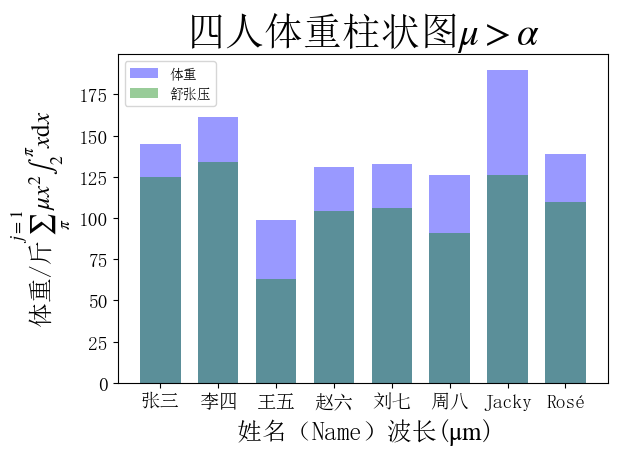

In [4]:
# 绘制参数
plt.bar(患者, 收缩压,
        label='体重',  # 图例标签名
        color='blue',  # 颜色
        alpha=0.4,  # 透明度
        width=0.7,  # 条形宽度
        )
plt.bar(患者, 舒张压,
        label='舒张压',  # 图例标签名
        color='green',  # 颜色
        alpha=0.4,  # 透明度
        width=0.7,  # 条形宽度
        )
# 版面设计
plt.legend(
          loc='upper left'   # 位置右上 upper center
          ,fontsize=10  # 字体大小
          )  # 图例
plt.title(r'四人体重柱状图$\mu > \alpha$'
          , fontsize=28
          #, weight='bold'
          )  # 标题
plt.xlabel(r'姓名（Name）波长($\mathrm{\mu m}$)'
           , fontsize=18
           #, weight='bold'
           )  # x轴标签
plt.ylabel(r'体重/斤$\sum_{\pi}^{j=1}\mu x^2\int_2^\pi x \mathrm{d}x$'
           , fontsize=18
           #, weight='bold'
           )  # y轴标签
# 调整显示区域
plt.tight_layout()
# 保存图片并显示
# plt.savefig('舒展压.pdf', dpi=1000)
plt.show()


2、绘制单组或多组柱状图（对Dataframe直接使用plot）

<AxesSubplot: xlabel='患者'>

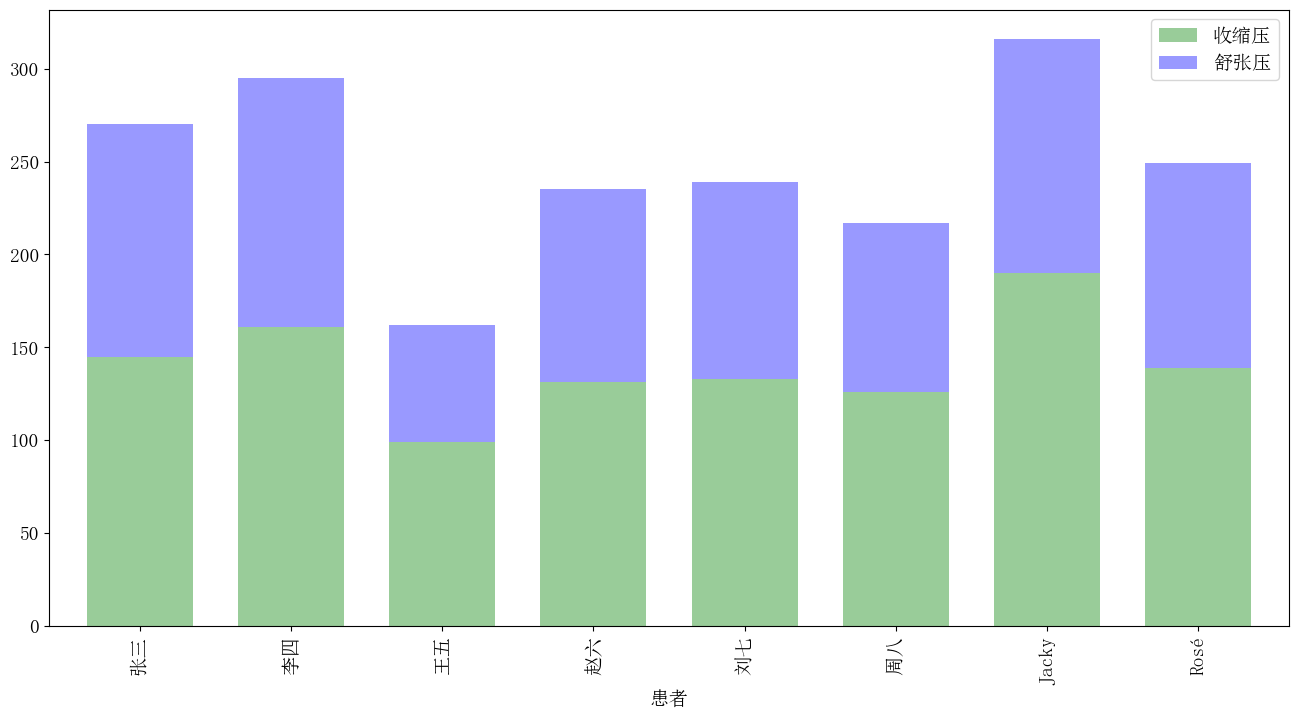

In [5]:
数据.plot.bar(x='患者',
            y=['收缩压', '舒张压'],
        label=['收缩压', '舒张压'],  # 图例标签名
        color=['green', 'blue'],  # 颜色
        alpha=0.4,  # 透明度
        width=0.7,  # 条形宽度
        stacked=True, # 堆叠
        figsize=(16, 8)
        )

# 3、matplotlib绘制多组柱状图（官方例子）

3.1一组

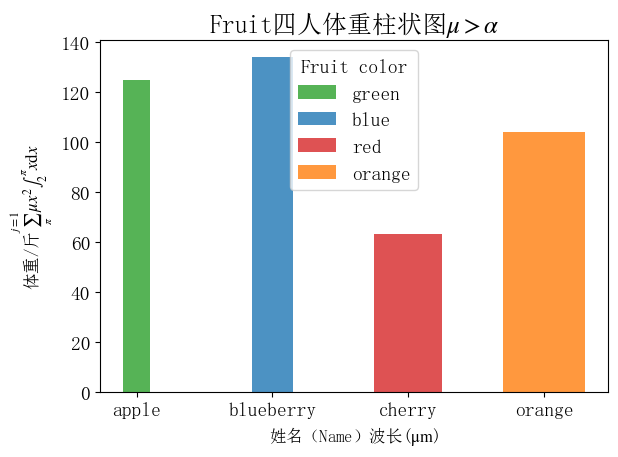

In [6]:
# plt.subplots()是一个函数，返回一个包含figure和axes对象的元组。因此，使用fig,ax = plt.subplots()将元组分解为fig和ax两个变量。
fig, ax = plt.subplots()
fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['green', 'blue', 'red', 'orange']
bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange']
bar_widths = [0.2, 0.3, 0.5, 0.6]
ax.bar(fruits
       , 舒张压[0:4]
       , label=bar_labels
       , color=bar_colors
       , alpha=0.8
       , width=bar_widths
       )
ax.set_title(r'Fruit四人体重柱状图$\mu > \alpha$'
             , fontsize=18
             , weight='bold'
            )
ax.set_xlabel(r'姓名（Name）波长($\mathrm{\mu m}$)'
              , fontsize=12
             , weight='bold'
              )
ax.set_ylabel(r'体重/斤$\sum_{\pi}^{j=1}\mu x^2\int_2^\pi x \mathrm{d}x$'
              , fontsize=12
             , weight='bold'
              )
ax.legend(title='Fruit color'
          , loc="upper center"
          )
# 调整显示区域
plt.tight_layout()
# 保存图片并显示
# plt.savefig('一组示例.pdf', dpi=1000)
plt.show()

3.2二组

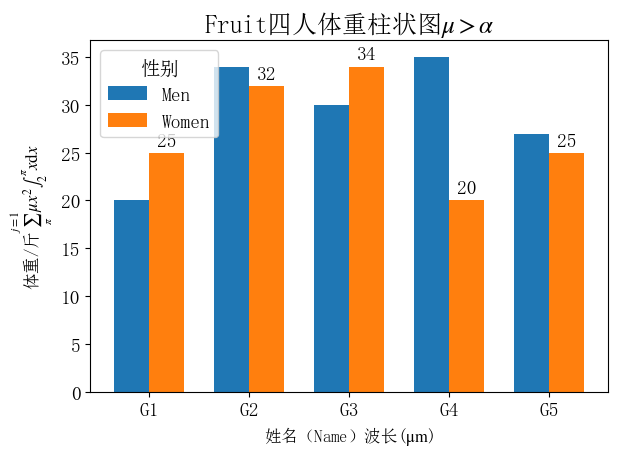

In [7]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(r'Fruit四人体重柱状图$\mu > \alpha$'
             , fontsize=18
             , weight='bold'
            )
ax.set_xlabel(r'姓名（Name）波长($\mathrm{\mu m}$)'
              , fontsize=12
             , weight='bold'
              )
ax.set_ylabel(r'体重/斤$\sum_{\pi}^{j=1}\mu x^2\int_2^\pi x \mathrm{d}x$'
              , fontsize=12
             , weight='bold'
              )
ax.set_xticks(x, labels)
ax.legend(title='性别'
          , loc='upper left'
          )
# ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=3)
# 调整显示区域
plt.tight_layout()
# 保存图片并显示
# plt.savefig('二组示例.pdf', dpi=1000)
plt.show()